In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# For visvalization
import matplotlib.pyplot as plt

from pandas import DataFrame

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.ar_model import AR

from matplotlib.font_manager import FontProperties

%matplotlib inline

# 1. Analyze the Overall Condition of SocialSupport

In [2]:
df_h_social = pd.read_csv('../dataset/correlation_clustered_data/H Vs Social.csv')
df_h_social = df_h_social.iloc[2:]
df_h_social

,Healthy life expectancy at birth,Social support,Selected,Country name,Cluster,Silhouette
2,0.449872883,0.287963785,No,Afghanistan,C4,0.6386561204964774
3,0.79836594,0.586143509,No,Albania,C1,0.6262584294939012
4,0.740803489,0.733753011,No,Algeria,C1,0.6443202194272261
5,0.805491728,0.878834939,No,Argentina,C5,0.6174956392230818
6,0.760043412,0.652325262,No,Armenia,C1,0.6462444134736096
...,...,...,...,...,...,...
138,0.757681197,0.860547667,No,Venezuela,C5,0.6790062905610139
139,0.785000164,0.779291027,No,Vietnam,C1,0.5477221133078899
140,0.522028788,0.688646256,No,Yemen,C2,0.6623285869738701
141,0.479310662,0.63570191,No,Zambia,C2,0.6743265148842061


In [3]:
c4_h_social_countries = df_h_social[df_h_social['Cluster'] == 'C4']['Country name']

c3_h_social_countries = df_h_social[df_h_social['Cluster'] == 'C3']['Country name']

In [4]:
c3_list = c3_h_social_countries.values.tolist()
print(c3_list)

['Australia', 'Austria', 'Belgium', 'Canada', 'Costa Rica', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Hong Kong S.A.R. of China', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'North Cyprus', 'Norway', 'Portugal', 'Singapore', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']


In [5]:
c4_list = c4_h_social_countries.values.tolist()
print(c4_list)

['Afghanistan', 'Bangladesh', 'Benin', 'Congo (Brazzaville)', 'Georgia', 'Guinea', 'Haiti', 'India', 'Malawi', 'Morocco', 'Pakistan', 'Rwanda', 'Togo']


In [6]:
df_ts = pd.read_csv('../dataset/normalized_filled_clean_data/normalized-filled-clean-world-happiness-report.csv')

In [7]:
df_ts

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2006,0.241065,0.139235,0.229885,0.412946,0.632737,0.486931,0.893460
1,Afghanistan,2007,0.241065,0.139235,0.229885,0.412946,0.632737,0.486931,0.893460
2,Afghanistan,2008,0.241065,0.139235,0.229885,0.412946,0.632737,0.486931,0.893460
3,Afghanistan,2009,0.362223,0.173441,0.375000,0.421875,0.579092,0.508228,0.859705
4,Afghanistan,2010,0.425840,0.194970,0.356322,0.430804,0.470426,0.441433,0.708861
...,...,...,...,...,...,...,...,...,...
2251,Zimbabwe,2017,0.225697,0.269215,0.665230,0.506696,0.680880,0.229429,0.755274
2252,Zimbabwe,2018,0.221766,0.275855,0.695402,0.520089,0.694635,0.258470,0.853376
2253,Zimbabwe,2019,0.057005,0.255936,0.672414,0.533482,0.514443,0.262343,0.839662
2254,Zimbabwe,2020,0.140279,0.231590,0.612069,0.546875,0.529574,0.315586,0.795359


In [8]:
df_c3 = df_ts[df_ts['Country name'].isin(c3_list)]
df_c4 = df_ts[df_ts['Country name'].isin(c4_list)]

In [9]:
#2006 - 2021
init = 2006
years = []
for i in range(16):
    years.append(init)
    init += 1

In [10]:
def get_yrly_avg_dict(df, years, col_item):
    avg_trend = {}
    for year in years:
        mean = df[df['year'] == year][col_item].mean()
        avg_trend[year] = mean
#     print(avg_trend)
    return avg_trend

In [11]:
def plot_by_dict(dis_dict, title, xlabel, ylabel):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.show()

def plot_acf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_acf(avg, lags=lags)
    
def plot_pacf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_pacf(avg, lags=lags)

# ACF, PACF Analysis

{2006: 0.921076099881094, 2007: 0.9180539040824415, 2008: 0.9063779891663364, 2009: 0.907162438895495, 2010: 0.9159235037653588, 2011: 0.9137683313515655, 2012: 0.9039338089575901, 2013: 0.9025713436385253, 2014: 0.8906311930241778, 2015: 0.8965021799445104, 2016: 0.9070055489496632, 2017: 0.9031658739595718, 2018: 0.9045283392786367, 2019: 0.9064853349187475, 2020: 0.9105727308759413, 2021: 0.907352358303607}


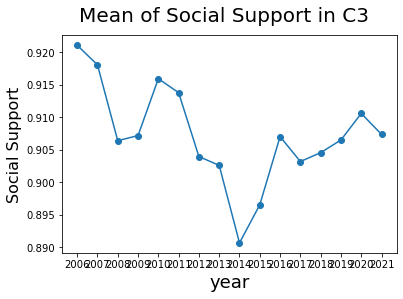

In [12]:
c3_social_avg_trend = get_yrly_avg_dict(df_c3, years, col_item = 'Social support')
print(c3_social_avg_trend)
plot_by_dict(c3_social_avg_trend, "Mean of Social Support in C3", "year", "Social Support")

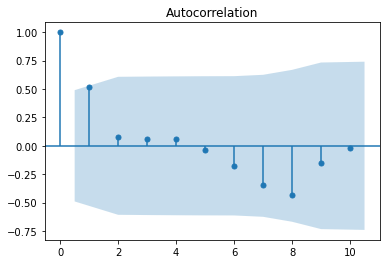

In [13]:
plot_acf_by_dict(c3_social_avg_trend, lags=10)

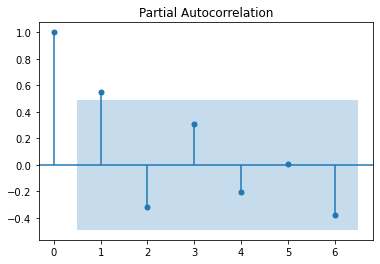

In [14]:
plot_pacf_by_dict(c3_social_avg_trend, lags=6)

# ARIMA Model Analysis

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


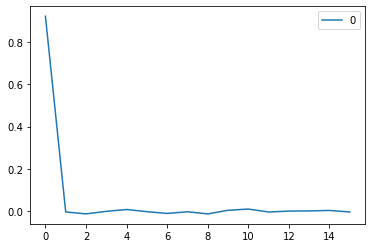

In [15]:
c3_avg = []
for a in c3_social_avg_trend.values():
    c3_avg.append(a)
    
c3_model = ARIMA(c3_avg, order=(1,1,1))
c3_model_fit = c3_model.fit()

residuals = DataFrame(c3_model_fit.resid)
residuals.plot()
plt.show()

# ARIMA Model Prediction

In [16]:
X = np.asarray(c3_avg)
X

array([0.9210761 , 0.9180539 , 0.90637799, 0.90716244, 0.9159235 ,
       0.91376833, 0.90393381, 0.90257134, 0.89063119, 0.89650218,
       0.90700555, 0.90316587, 0.90452834, 0.90648533, 0.91057273,
       0.90735236])

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.898451, expected=0.907006
predicted=0.906389, expected=0.903166
predicted=0.903280, expected=0.904528
predicted=0.904440, expected=0.906485
predicted=0.906404, expected=0.910573
predicted=0.910461, expected=0.907352
Test RMSE: 0.004


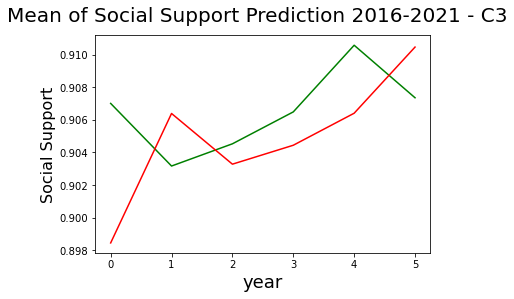

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
fig = plt.figure()
fig.suptitle('Mean of Social Support Prediction 2016-2021 - C3', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('Social Support', fontsize=16)
plt.plot(test, color='green')
plt.plot(predictions, color='red')
plt.show()

# Seasonal Analysis

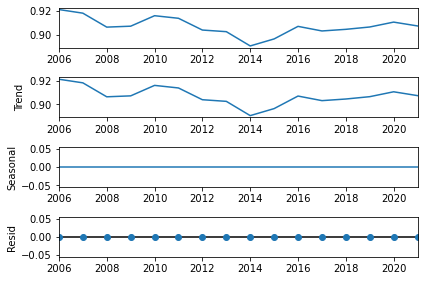

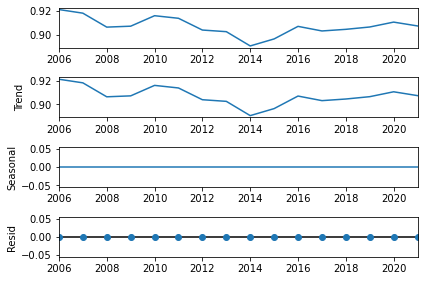

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

da = pd.DataFrame(
    { 'value': c3_avg }, 
    index=pd.period_range(
        '2006-01-01',
         freq='A',
         periods=16
    ))

# da = da.interpolate(inplace = True)
da.index = da.index.to_timestamp()

result = seasonal_decompose(da, model='additive',period=1)
result.plot()
# result.trend.plot()

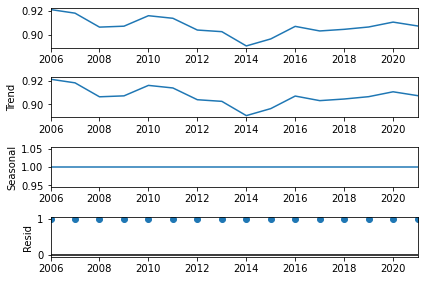

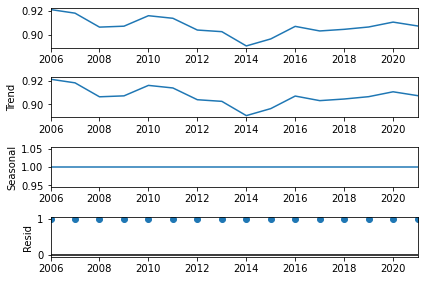

In [19]:
result = seasonal_decompose(da, model='multiplicative',period=1)
result.plot()

# 2. Condition of SocialSupport by Countries

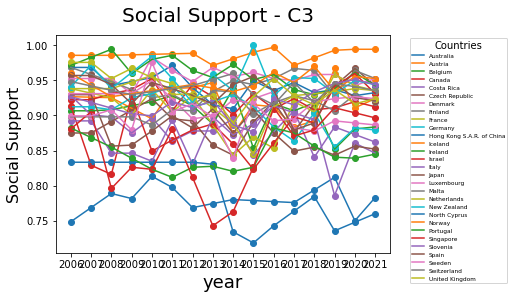

In [20]:
fig = plt.figure()
fig.suptitle("Social Support - C3", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Social Support", fontsize=16)

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Social support']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

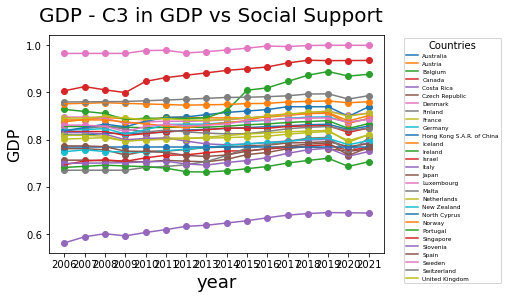

In [21]:
fig = plt.figure()
fig.suptitle("GDP - C3 in GDP vs Social Support", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("GDP", fontsize=16)

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

# 3. Forecastability of a SocialSupport for C3 Countries

The more regular and repeatable patterns a time series has, the easier it is to forecast. The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it.

Another better alternate is the ‘Sample Entropy’.

Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’.

In [22]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
#         print(N, " ", m)
        if (N - m + 1) == 0:
             return np.nan
        return (N - m + 1)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    if(_phi(m) == 0):
        return np.nan

    return -np.log(_phi(m+1) / _phi(m))

def sort_dict(dis_dict):
    return {k: v for k, v in sorted(dis_dict.items(), key=lambda item: item[1])}

In [23]:
AE_dict = {}

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Social support']
    data.index = np.arange(0, 16)
    AE = SampEn(data, m=2, r=0.2*np.std(data))
    AE_dict[country] = AE


# The Lower the approximate entropy, 
# the Easier it is to forecast it. 
Sorted_AE_dict = sort_dict(AE_dict)

top5_countries_AE  = list(Sorted_AE_dict)[:5]
top5_countries_name = list(Sorted_AE_dict.keys())[:5]

bottom5_countries_AE = list(Sorted_AE_dict)[-5:]
bottom5_countries_name = list(Sorted_AE_dict.keys())[-5:]

print(top5_countries_name)
print(bottom5_countries_name)

['Australia', 'Austria', 'Belgium', 'Canada', 'Costa Rica']
['Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']


C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


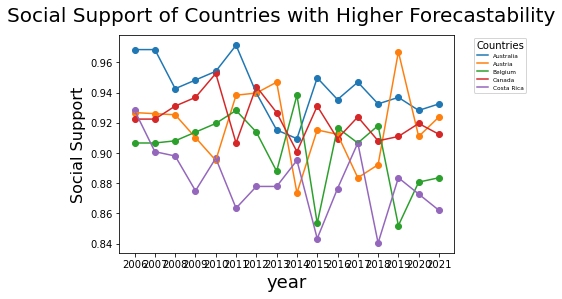

In [24]:
fig = plt.figure()
fig.suptitle("Social Support of Countries with Higher Forecastability", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Social Support", fontsize=16)

for country in top5_countries_name:
    data = df_c3[df_c3['Country name'] == country]['Social support']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(top5_countries_name, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

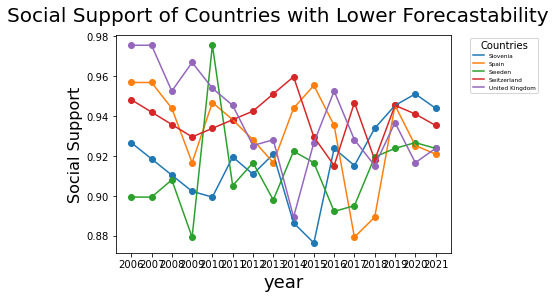

In [25]:
fig = plt.figure()
fig.suptitle("Social Support of Countries with Lower Forecastability", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Social Support", fontsize=16)

for country in bottom5_countries_name:
    data = df_c3[df_c3['Country name'] == country]['Social support']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(bottom5_countries_name, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

In [26]:
# c4_social_avg_trend = get_yrly_avg_dict(df_c4, years, col_item = 'Social support')
# plot_by_dict(c4_social_avg_trend, "Mean of Social Support in C4", "year", "Social Support")

In [27]:
# plot_acf_by_dict(c4_social_avg_trend, lags=10)

In [28]:
# plot_pacf_by_dict(c4_social_avg_trend, lags=6)

In [29]:
# c4_avg = []
# for a in c4_social_avg_trend.values():
#     c4_avg.append(a)
    
# c4_model = ARIMA(c4_avg, order=(1,0,1))
# c4_model_fit = c4_model.fit()

# residuals = DataFrame(c4_model_fit.resid)
# residuals.plot()
# plt.show()

In [30]:
# X = np.asarray(c4_avg)
# X

In [31]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# # split into train and test sets
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# # walk-forward validation
# for t in range(len(test)):
# 	model = ARIMA(history, order=(1,1,1))
# 	model_fit = model.fit()
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# fig = plt.figure()
# fig.suptitle('Mean of Social Support Prediction 2016-2021 - C4', fontsize=20)
# plt.xlabel('year', fontsize=18)
# plt.ylabel('Social Support', fontsize=16)
# plt.plot(test, color='green')
# plt.plot(predictions, color='red')
# plt.show()

In [32]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# series = pd.Series(c4_social_avg_trend)
# series
# result = seasonal_decompose(series, model='additive', period=1)
# result.plot()